# Differenzialgleichungen mit Python lösen

In diesem Notebook wollen wir lernen, wie Differenzialgleichungssysteme in Python gelöst werden.

## Numerische Integration in Python

Hier lernst du, wie du Python dazu bringst, die DGL für dich zu lösen. Dabei wird dir Python keine analytische Formel zurück geben, sondern die Werte der gesuchten Funktion für bestimmte Zeitpunkte, die du vorgibst.

Zeit: nicht länger 20 Minuten

In [1]:
# Als erstes müssen Bibliotheken geladen werden

import numpy as np # die Mathebibliothek
import matplotlib.pyplot as plt # die Bibliothek zum Plotten

from scipy.integrate import odeint # diese Funktion löst die DGLs für dich :)

In [4]:
%matplotlib notebook 
# für interaktive Plots, total praktisch! Wenn du keine Interaktion siehst, dann melde dich bei Kathinka und Louisa.

Die Differenzialgleichung, die wir uns jetzt anschauen wollen hat die Form $$\frac{\mathrm{d}}{\mathrm{d}t} x(t) = c - k \cdot x(t)$$

In [5]:
# In dieser Zelle wird die Differenzialgleichung definiert in einer Funktion

def simple_ode(x,t):
    #Definiere die Parameter
    c = 1.0
    k = 2.0
    
    #Definiere die DGL
    dxdt = c - k*x
    
    #Gib die DGL zurück
    return dxdt

In [6]:
# Definiere die Anfangsbedingung und die Zeitpunkte für die Integration
T = np.arange(0,10,0.1)
X0 = 0

# Löse die DGL
X = odeint(simple_ode, X0, T)


<IPython.core.display.Javascript object>


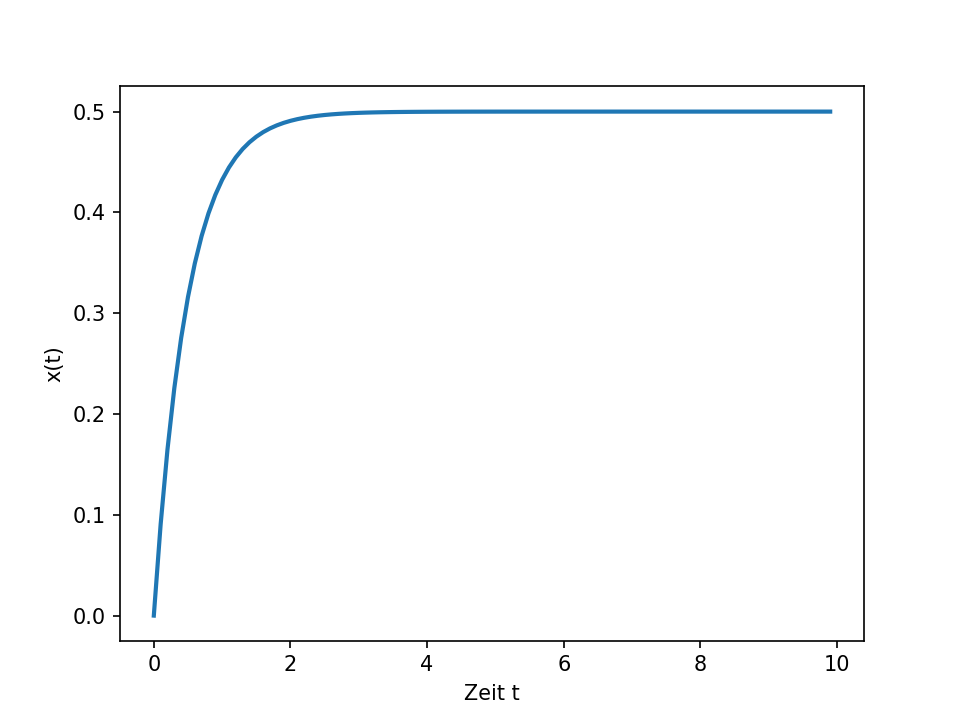

Text(0, 0.5, 'x(t)')

In [7]:
# plotte das Ergebnis
fig, ax = plt.subplots()
ax.plot(T,X,linewidth=2)
ax.set_xlabel('Zeit t')
ax.set_ylabel('x(t)')

<IPython.core.display.Javascript object>


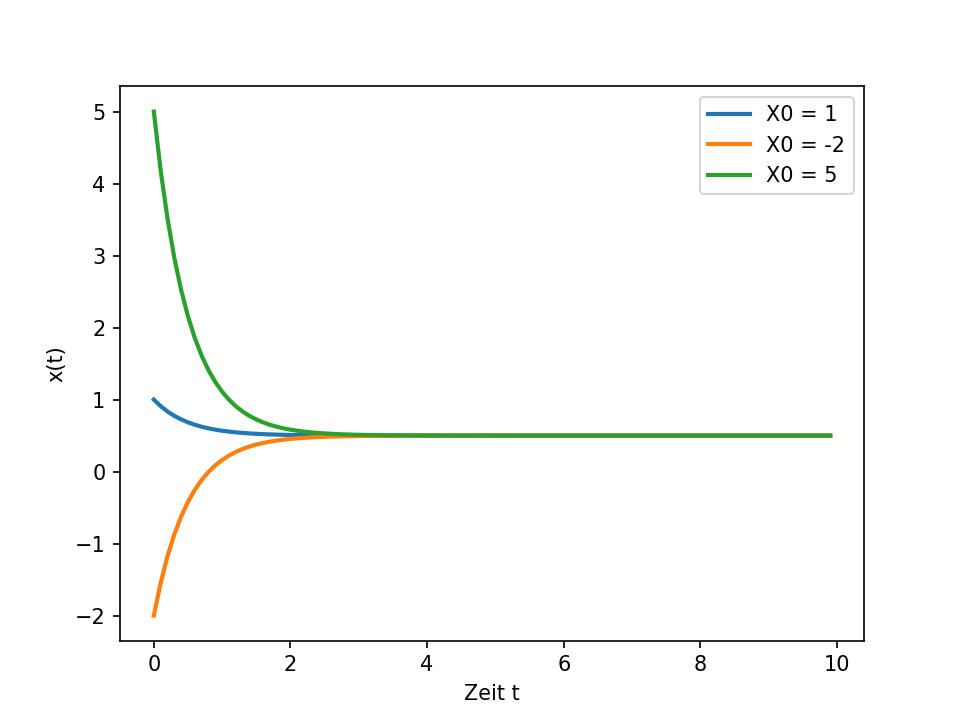

In [9]:
# Man kann auch verschiedene Anfangswerte in einen Plot machen. Spiele ruhig mit den Anfangswerten, um ein Gefühl für die DGL zu bekommen.

fig, ax = plt.subplots()

X0 = 1
X = odeint(simple_ode,X0,T)
ax.plot(T,X,linewidth=2, label = f'X0 = {X0}')

X0 = -2
X = odeint(simple_ode,X0,T)
ax.plot(T,X,linewidth=2, label = f'X0 = {X0}')

X0 = 5
X = odeint(simple_ode,X0,T)
ax.plot(T,X,linewidth=2, label = f'X0 = {X0}')

ax.set_xlabel('Zeit t')
ax.set_ylabel('x(t)')
ax.legend()

## Explizites Euler-Verfahren (optional)

Hier lernst du ein Verfahren kennen, wie man DGLs lösen kann, ohne am Ende eine analytische Form für die Lösung zu haben.

Informiere dich, wie das explizite Euler-Verfahren funktioniert (Wikipedia (sehr formal und technisch) oder Youtube oder oder oder...).

Im Folgenden ist die Euler-Methode schon programmiert. Versuche den Code nachzuvollziehen und plotte das Ergebnis.

Die Differenzialgleichung von vorhin wird auch hier benutzt.

In [ ]:
# Diese Funktion integriert die definierte DGL bis zum Zeitpunkt T mit dem expliziten Euler-Verfahren
# N ist die Anzahl der Zeitschritte, x0 ist der Anfangswert
# Benutzung: x = SimpleEuler(x0,T,N)

def SimpleEuler(x0,T,N):
    k = 1
    # einige Parameter
    dt= float(T)/N
    timespan = np.arange(0,T,dt)
    x = [float(x0)]
    
    # Integration
    for i in range(1,N):
        x.append(x[i-1]+dt*(-k*x[i-1]))
  
    return x, timespan, k

In [ ]:
# Wähle einen Anfangswert, die Zeitspanne und die Zeitschritte
# Probiere ruhig verschiedene Werte aus, um ein Gefühl für das Verfahren zu bekommen :)

x0 = 
T = 
N = 
x, timespan, k = SimpleEuler( ) # was muss in die Klammern und in welcher Reihenfolge?

In [ ]:
 # plotte die Lösung des Euler-Verfahrens und die analytische Lösung

fig, ax = plt.subplots()
ax.plot( , ,'bo',label='Euler Methode') # plotte die Lösung von x gegen die Zeitspanne
ax.plot(timespan,x0*np.exp(-k*timespan),'rv',label='Analytische Lösung')
ax.set_xlabel('Zeit t')
ax.set_ylabel('x(t)')
ax.legend(loc='upper right')

## Das Lorenzsystem

Jetzt bist du an der Reihe! Programmiere das folgende DGL-System, das Lorenzsystem. Es wurde 1963 von Edward Lorenz entwickelt und ist ein sehr stark vereinfachtes Modell der Erdathmosphäre. Das Gleichungssystem sieht wie folgt aus:

$$\frac{\mathrm{d}}{\mathrm{d}t} X(t) = a \cdot (Y(t) - X(t)),$$
$$\frac{\mathrm{d}}{\mathrm{d}t} Y(t) = X(t) \cdot (b - Z(t)) - Y(t),$$
$$\frac{\mathrm{d}}{\mathrm{d}t} Z(t) = X(t) \cdot Y(t) - c \cdot Z(t).$$

Diese **gekoppelten** Differenzialgleichungen (die Änderungsrate der einzelnen Funktionen hängen auch von den anderen Funktionen ab) haben die Ordnung 1 (nur Ableitungen erster Ordnung) und sind **nichtlinear**, das heißt, dass es auch Produkte der einzelnen Funktionen gibt und nicht nur Multiplikation mit Konstanten.

Aufgaben 1: Definiere die Funktion für das oben angegebene DGL System.

Zeit: nicht länger als 30 Minuten

In [52]:
def lorenz(r, t, parameter):
    #r ist ein 2d array, das die Werte für x, y und z hat. Weise die einzelnen Spalten Variablen zu, um mit diesen weiter zu arbeiten
    x = r[0]
    y = r[1]
    z = r[2]
    
    #parameter ist ein Tuple mit den drei Parametern des Lorenzsystems a,b,c. Weise die einzelnen Werte Variablen zu
    a,b,c = parameter
    #definiere nun die Differenzialgleichungen
    dx = a*(y-x)
    dy = x*(b-z)-y
    dz = x*y-c*z

    #Am Ende musst du aus deinen drei 1D arrays wieder ein 2d array machen, welches du dann zurück gibst.
    dt=[dx,dy,dz]

    return dt

Aufgabe 2: Löse die DGL für Zeitpunkte zwischen 0 und 20, Schrittweite 0.01. Als Startwerte kannst du alle auf 1 setzen, die Parameter setzt ihr am Besten auf $a = 16$, $b = 45.92$, $c = 0.4$.


In [53]:
T = np.arange(0,20.01,0.01)
R0 =[1,1,1]
parameter = tuple([16,45.92,0.4])

Aufgabe 3: Löse die DGL und plotte das Ergebnis!

In [54]:
# Du kannst einer Funktion auch über odeint Parameter übergeben. Das heißt, dass du die Parameter in deiner Funktion nicht schon vordefinieren musst.
# Wenn du in Funktionen PArameter fest definierst, nennt man das 'hard coding'. Das ist unter Programmierer*innen verpönt. ;)
# Die Parameter müssen in einer bestimmten Form übergeben werden, deshalb steht das schon in der Funktion. Aber da fehlt noch was, um sie auszuführen.
# Jetzt bist du gefragt! :D
X = odeint( lorenz, R0, T, args=(parameter,))

<IPython.core.display.Javascript object>


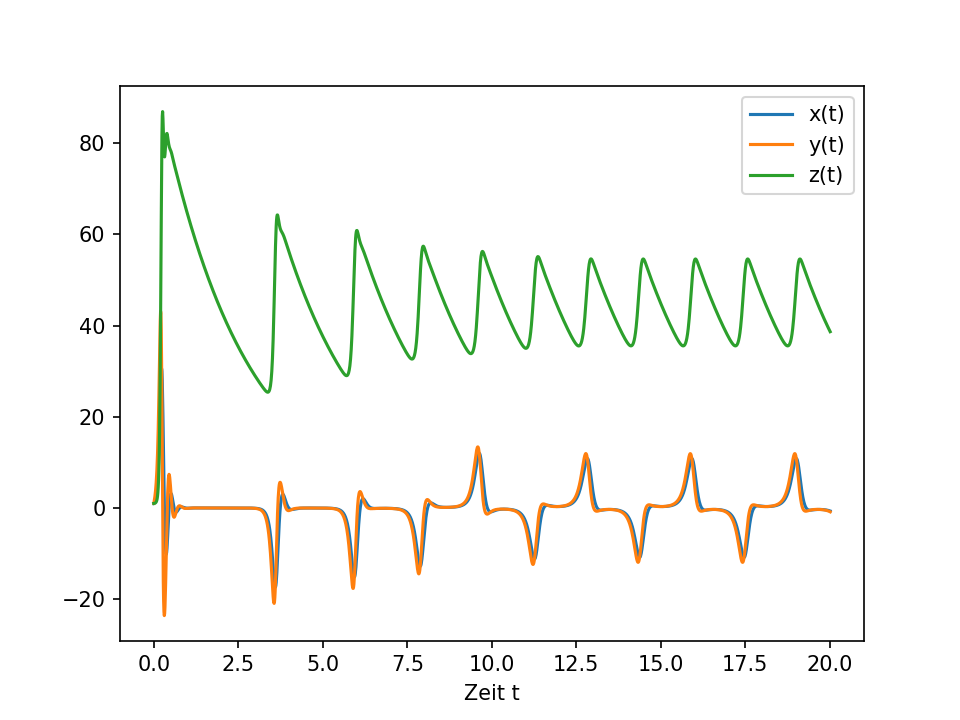

Text(0.5, 0, 'Zeit t')

In [55]:
fig, ax = plt.subplots()
ax.plot(T, X[:, 0], label = 'x(t)')
ax.plot(T, X[:, 1], label = 'y(t)')
ax.plot(T, X[:, 2], label = 'z(t)')
ax.legend()
ax.set_xlabel('Zeit t')

## Differenzialgleichungen herleiten

Im Ordner Samstag findest du ein pdf ('DGausRG.pdf'), das erklärt, wie man Differenzialgleichungen aus (bio-)chemischen Reaktionsgleichungen herleitet. Das Kapitel zum Massenwirkungsgesetz kannst du überspringen, wenn du möchtest.

Die ***Lotka-Volterra-Gleichungen*** modellieren die Populationsdynamik von zwei Tierpopulationen, die sich zueinander in einer Räuber-Beute-Beziehung befinden. Du kannst zunächst "Reaktionsgleichungen" aufstellen, die die Räuber-Beute-Beziehungen darstellen. Aus den "Reaktionsgleichungen" kannst du dann Differenzialgleichungen herleiten.

Das Modell macht natürlich vereinfachte Annahmen (sonst wäre es ja kein Modell!). Unsere Annahmen sind die folgenden:


*   Die Beutepopulation wird mit einer Geburtenratenkonstante von *a* geboren
*   Die Räuberpopulation stirbt mit einer Sterberatenkonstante von *d*
* Wenn Räuber auf Beute trifft, wird die Beute gefressen und stirbt, was mit einer Ratenkonstante von *b* passiert.
* Wenn Räuber auf Beute trifft, kann der Räuber die Beute fressen und sich dadurch vermehren, was mit einer Ratenkonstante von *g* passiert.

Stelle nun je eine Differenzialgleichung für die Beutepopulation und die Räuberpopulation auf, um die Veränderung der Populationsgrößen über die Zeit zu beschreiben.

Implementiere das Differenzialgleichungssystem und plotte den zeitlichen Verlauf der Räuber- und Beutepopulationen. Finde geeignete Werte für die Parameter *a*,*b*,*d*,*g* sowie Anfangswerte und einen Beobachtungszeitraum.

Nachdem du das Modell implementiert hast, beantworte die folgenden Fragen:

1.   Wie sieht die Populationsdynamik aus?
2.   Was denkst du, wie gut die modellierte Populationsdynamik der realen Populationsdynamik entspricht?
3. Welche Vereinfachungen wurden beim Modell vorgenommen, die in der Realität komplizierter sind und welche realen Gegebenheiten wurde im Modell ganz weggelassen? Warum?
4. Wofür ist das Modell nützlich?

Zeit: nicht länger als 90 Minuten



In [71]:
def lotka(r, t, parameter):
    #r ist ein 2d array, das die Werte für B und J hat. Weise die einzelnen Spalten Variablen zu, um mit diesen weiter zu arbeiten
    B = r[0]
    J = r[1]
    
    
    #parameter ist ein Tuple mit den drei Parametern des Lorenzsystems a,b,c. Weise die einzelnen Werte Variablen zu
    a,b,d,g = parameter
    #definiere nun die Differenzialgleichungen
    dB = B * (a - b * J)
    dJ = -J * (d - g * B)

   

    #Am Ende musst du aus deinen drei 1D arrays wieder ein 2d array machen, welches du dann zurück gibst.
    dt=[dB,dJ]

    return dt

In [72]:
T = np.arange(0,20.01,0.01)
R0 =[1,1]
parameter = tuple([1,2,3,4])

In [73]:
X = odeint( lotka, R0, T, args=(parameter,))

<IPython.core.display.Javascript object>


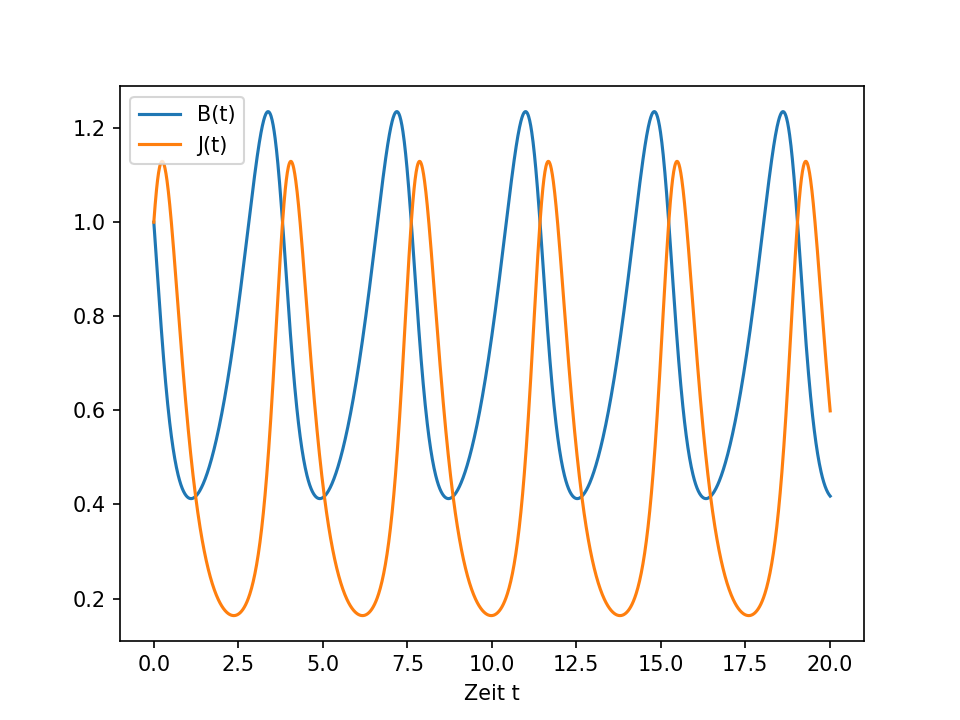

Text(0.5, 0, 'Zeit t')

In [74]:
fig, ax = plt.subplots()
ax.plot(T, X[:, 0], label = 'B(t)')
ax.plot(T, X[:, 1], label = 'J(t)')

ax.legend()
ax.set_xlabel('Zeit t')